In [389]:
# Importando a biblioteca Pandas
import pandas as pd

In [390]:
# Lendo o arquivo CSV
df = pd.read_csv('flights.csv') 

In [391]:
# Visualizando as primeiras 5 linhas do DataFrame
df.head()

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Fly Date,Origin Population,Destination Population
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254.0,200810,122049,86219
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103.0,199011,284093,76034
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103.0,199012,284093,76034
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103.0,199010,284093,76034
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156.0,199002,147300,76034


In [392]:
# Visualizando as informações 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3606803 entries, 0 to 3606802
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Origin                  object 
 1   Destination             object 
 2   Origin City             object 
 3   Destination City        object 
 4   Passengers              int64  
 5   Seats                   int64  
 6   Flights                 int64  
 7   Distance                float64
 8   Fly Date                int64  
 9   Origin Population       int64  
 10  Destination Population  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 302.7+ MB


In [393]:
# Verificando se tem dados nulos
df.isnull().sum()

Origin                    0
Destination               0
Origin City               0
Destination City          0
Passengers                0
Seats                     0
Flights                   0
Distance                  0
Fly Date                  0
Origin Population         0
Destination Population    0
dtype: int64

In [394]:
# gerando um resumo estatístico das colunas em duas casas decimais
df.describe().round(2)

,Passengers,Seats,Flights,Distance,Fly Date,Origin Population,Destination Population
count,3606803.00,3606803.00,3606803.00,3606803.00,3606803.00,3606803.0,3606803.00
mean,2688.91,4048.30,37.23,697.32,200063.39,5871502.5,5897982.44
std,4347.62,6200.87,49.62,604.42,574.67,7858061.6,7906127.41
min,0.00,0.00,0.00,0.00,199001.00,13005.0,12887.00
25%,109.00,156.00,2.00,273.00,199603.00,1030597.0,1025470.00
50%,1118.00,1998.00,25.00,519.00,200111.00,2400193.0,2400193.00
75%,3503.00,5370.00,55.00,927.00,200601.00,8613622.0,8635706.00
max,89597.00,147062.00,1128.00,5095.00,200912.00,38139592.0,38139592.00


In [395]:
# Visualizando a quantidade de valores em cada
#  aeroporto de origem nas primeiras 10 linhas
df['Origin'].value_counts().head(10)

Origin
ORD    158496
ATL    131046
DFW    106698
DTW     99624
MSP     98922
LAX     87299
CLT     85615
PHL     83244
IAH     81249
EWR     79810
Name: count, dtype: int64

In [396]:
# Visualizando a quantidade de valores diferentes
#  na coluna dos aeroportos de origem
df['Origin'].nunique()

683

In [397]:
# Filtrando apenas voos do ano 2000
df['Year'] = df['Fly Date'].astype(str).str[:4]
voos_2000 = df[df['Year'] == '2000']
voos_2000.head()

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Fly Date,Origin Population,Destination Population,Year
636,SEA,RDM,"Seattle, WA","Bend, OR",2023,4144,112,228.0,200001,6104758,116618,2000
637,SEA,RDM,"Seattle, WA","Bend, OR",2995,4699,127,228.0,200012,6104758,116618,2000
638,SEA,RDM,"Seattle, WA","Bend, OR",3134,5328,144,228.0,200009,6104758,116618,2000
639,SEA,RDM,"Seattle, WA","Bend, OR",3420,5328,144,228.0,200006,6104758,116618,2000
640,SEA,RDM,"Seattle, WA","Bend, OR",3108,5106,138,228.0,200010,6104758,116618,2000


In [398]:
# Filtrando voos que incluam JFK como aeroporto de origem 
jfk_origin = df[df['Origin'].isin(['JFK'])]
jfk_origin.nunique()

Origin                        1
Destination                 233
Origin City                   1
Destination City            196
Passengers                10763
Seats                      8639
Flights                     372
Distance                    228
Fly Date                    240
Origin Population            20
Destination Population     1624
Year                         20
dtype: int64

In [399]:
# Filtrando voos que não incluam JFK como aeroporto de origem
non_jfk_origin = df[~df['Origin'].isin(['JFK'])]
non_jfk_origin.nunique()

Origin                      682
Destination                 706
Origin City                 535
Destination City            546
Passengers                37237
Seats                     40883
Flights                     920
Distance                   2772
Fly Date                    240
Origin Population          6679
Destination Population     6692
Year                         20
dtype: int64

In [400]:
# Filtrando voos com mais de 100 passageiros e distância menor que 1000 milhas
passageiro_distancia = df[(df['Passengers'] > 100) & (df['Distance'] < 2000)]
passageiro_distancia.head()

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Fly Date,Origin Population,Destination Population,Year
10,SEA,RDM,"Seattle, WA","Bend, OR",453,3128,23,228.0,199001,5154164,76034,1990
11,SEA,RDM,"Seattle, WA","Bend, OR",784,2720,20,228.0,199002,5154164,76034,1990
12,SEA,RDM,"Seattle, WA","Bend, OR",749,2992,22,228.0,199003,5154164,76034,1990
14,PDX,RDM,"Portland, OR","Bend, OR",349,851,23,116.0,199001,1534762,76034,1990
15,PDX,RDM,"Portland, OR","Bend, OR",1376,2898,161,116.0,199001,1534762,76034,1990


In [401]:
# Filtrando voos com destino ou origem a Nova York ou Los Angeles
voos_ny_la = df[df['Origin City'].str.contains('New York|Los Angeles') 
                | df['Destination City'].str.contains('New York|Los Angeles')]
voos_ny_la.head()

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Fly Date,Origin Population,Destination Population,Year
73,LAX,RDM,"Los Angeles, CA","Bend, OR",1599,2992,22,726.0,199003,22585772,76034,1990
74,LAX,RDM,"Los Angeles, CA","Bend, OR",643,2856,21,726.0,199001,22585772,76034,1990
75,LAX,RDM,"Los Angeles, CA","Bend, OR",1280,2720,20,726.0,199002,22585772,76034,1990
76,LAX,RDM,"Los Angeles, CA","Bend, OR",66,104,1,726.0,199001,22585772,76034,1990
1112,LAX,RDM,"Los Angeles, CA","Bend, OR",154,210,3,726.0,200612,25427320,148670,2006


In [402]:
# Filtrando apenas onde a população de origem é maior que 1 milhão
populacao_origem  = df[df['Origin Population'] > 1_000_000]
populacao_origem.head()
                

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Fly Date,Origin Population,Destination Population,Year
9,SEA,RDM,"Seattle, WA","Bend, OR",8,18,1,228.0,199002,5154164,76034,1990
10,SEA,RDM,"Seattle, WA","Bend, OR",453,3128,23,228.0,199001,5154164,76034,1990
11,SEA,RDM,"Seattle, WA","Bend, OR",784,2720,20,228.0,199002,5154164,76034,1990
12,SEA,RDM,"Seattle, WA","Bend, OR",749,2992,22,228.0,199003,5154164,76034,1990
13,SEA,RDM,"Seattle, WA","Bend, OR",11,18,1,228.0,199004,5154164,76034,1990


In [403]:
# Voos que possuem assentos vazios
assentos_vazios = df.query('Seats > Passengers')
assentos_vazios['Destination City']

0                       Ames, IA
1                       Bend, OR
2                       Bend, OR
3                       Bend, OR
4                       Bend, OR
                   ...          
3606797    Fort Leonard Wood, MO
3606798    Fort Leonard Wood, MO
3606799    Fort Leonard Wood, MO
3606800    Fort Leonard Wood, MO
3606801    Fort Leonard Wood, MO
Name: Destination City, Length: 3242926, dtype: object

In [404]:
# Filtrando apenas voos menores que 300 milhas e com mais de 10 vezes por mês
voos_curtos_lucrativos = df.query('Distance < 300 & Flights > 10')
voos_curtos_lucrativos.head()

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Fly Date,Origin Population,Destination Population,Year
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103.0,199011,284093,76034,1990
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103.0,199012,284093,76034,1990
10,SEA,RDM,"Seattle, WA","Bend, OR",453,3128,23,228.0,199001,5154164,76034,1990
11,SEA,RDM,"Seattle, WA","Bend, OR",784,2720,20,228.0,199002,5154164,76034,1990
12,SEA,RDM,"Seattle, WA","Bend, OR",749,2992,22,228.0,199003,5154164,76034,1990


In [405]:
# Salvando em um arquivo CSV
voos_curtos_lucrativos.to_csv('voos_lucrativos.csv', index=False)

In [406]:
# Agrupando por origem e destino
agrupado = df.groupby(['Origin', 'Destination'])

In [407]:
# Agregando a função soma sobre os passageiros e o número de voos
agregado = agrupado.agg({'Passengers' : 'sum', 'Flights' : 'sum'})

In [408]:
# Ordenando os valores em ordem decrescente
ordem_passageiros = agregado.sort_values(by=['Passengers', 'Flights'], ascending=False)
ordem_passageiros.head()

,,Passengers,Flights
Origin,Destination,,
OGG,HNL,32364612,394909
HNL,OGG,29744742,389964
LAX,HNL,28964154,140973
HNL,LAX,28632161,135848
LAS,LAX,26333721,291759


In [409]:
# Convetendo Fly Date em datetime e agrupando por data de voo
df['Month'] = pd.to_datetime(df['Fly Date'], format = '%Y%m').dt.to_period('M')
df.head()

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Fly Date,Origin Population,Destination Population,Year,Month
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254.0,200810,122049,86219,2008,2008-10
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103.0,199011,284093,76034,1990,1990-11
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103.0,199012,284093,76034,1990,1990-12
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103.0,199010,284093,76034,1990,1990-10
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156.0,199002,147300,76034,1990,1990-02


In [410]:
# Agrupando por mês
voos_mes = df.groupby('Month')

In [411]:
# Agregando a soma da coluna voos
voos_agregados = voos_mes.agg({'Flights' : 'sum'})

In [412]:
# Ordenando os voos em relação aos meses
ordem_voos = voos_agregados.sort_values(by='Month', ascending=False)
ordem_voos.head(10)

,Flights
Month,
2009-12,587123
2009-11,576901
2009-10,602156
2009-09,581047
2009-08,632620
2009-07,644983
2009-06,619372
2009-05,614442
2009-04,601592


In [413]:
# categorizando a coluna distância por intervalos de milhas
intervalos_distancia = pd.cut(df['Distance'], bins=[0, 500, 1000, 2000, 3000, 4000, df['Distance'].max()])

In [414]:
# Agrupando por intervalos de distância
intervalos_agrupados = df.groupby(intervalos_distancia, observed=False).agg({'Flights' : 'sum', 'Passengers' : 'sum'})


In [415]:
# Ordenando os dados em relação a distância e encontrando o total de voos
#  e passageiros para cada categoria de distância
ordenando_distancia = intervalos_agrupados.sort_values(by='Distance', ascending=True)
ordenando_distancia

,Flights,Passengers
Distance,,
"(0.0, 500.0]",72824152,3967230552
"(500.0, 1000.0]",37086403,2982802042
"(1000.0, 2000.0]",19094295,2056781986
"(2000.0, 3000.0]",4890525,653367069
"(3000.0, 4000.0]",243395,21409447
"(4000.0, 5095.0]",79750,16272506


In [416]:
# Agrupando por destino
destinos_agrupados = df.groupby('Destination')

In [417]:
# Agregando a soma dos voos
soma_voos = destinos_agrupados.agg({'Flights' : 'sum'})

In [418]:
# Encontrando os 10 aeroportos de destinos mais movimentados
aeroportos_movimentados = soma_voos.nlargest(10, 'Flights')
aeroportos_movimentados

,Flights
Destination,
ORD,6896285
ATL,6544759
DFW,5987886
LAX,4096702
DTW,3448042
PHX,3208877
MSP,3200182
IAH,3196768
STL,3177639


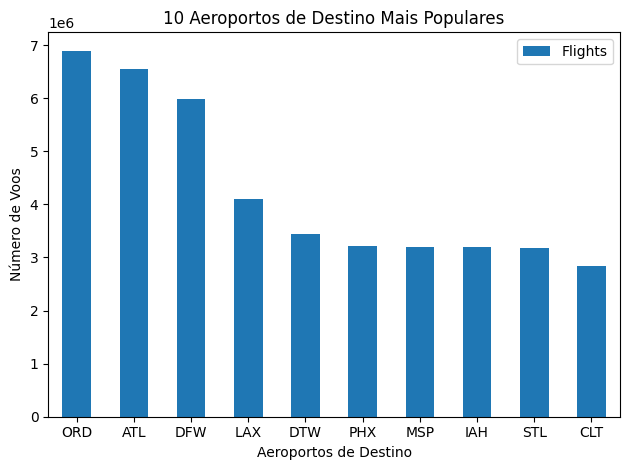

In [419]:
# Vizualizando os dados em um gráfico de barras
import matplotlib.pyplot as plt
aeroportos_movimentados.plot(kind='bar')
plt.title('10 Aeroportos de Destino Mais Populares')
plt.ylabel('Número de Voos')
plt.xlabel('Aeroportos de Destino')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [420]:
# Agrupando por origem e destino
origem_destino_agrupados = df.groupby(['Origin', 'Destination']).agg({'Passengers' : 'sum'})

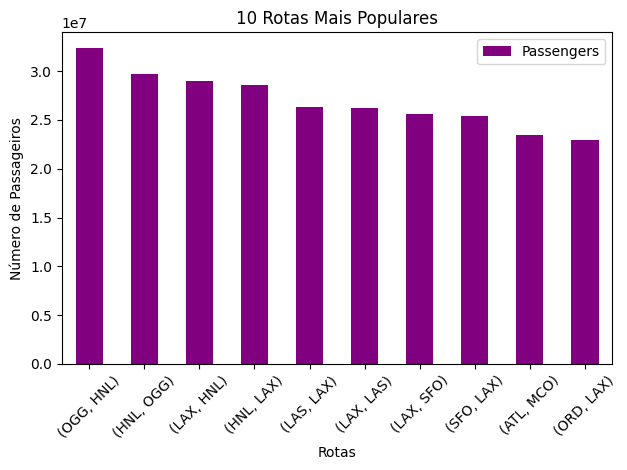

In [421]:
# Visualizando as 10 rotas com maior número de passageiros
rotas_populares = origem_destino_agrupados.nlargest(10, 'Passengers')
rotas_populares.plot(kind='bar', color='purple')
plt.title('10 Rotas Mais Populares')
plt.ylabel('Número de Passageiros')
plt.xlabel('Rotas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [422]:
# Selecionando apenas os 4 primeiros números da coluna ano
df['Year'] = df['Fly Date'].astype(str).str.slice(0, 4)

In [423]:
# Agrupando a coluna ano
ano_agrupado = df.groupby('Year').agg({'Flights' : 'sum'})

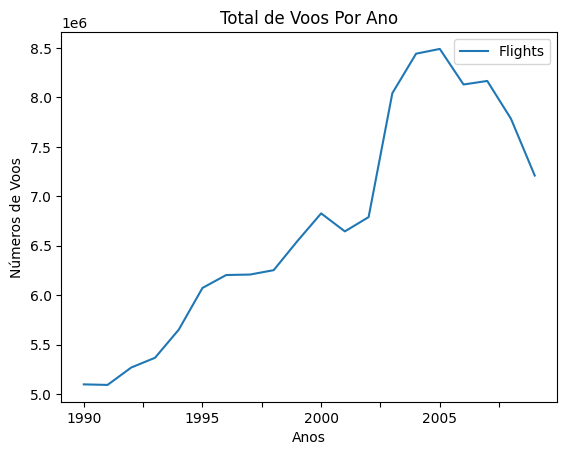

In [424]:
# Visualizando o total de voos por ano em um gráfico de linhas
ano_agrupado.plot(kind='line')
plt.title('Total de Voos Por Ano')
plt.ylabel('Números de Voos')
plt.xlabel('Anos')
plt.xticks(rotation=0)
plt.show()

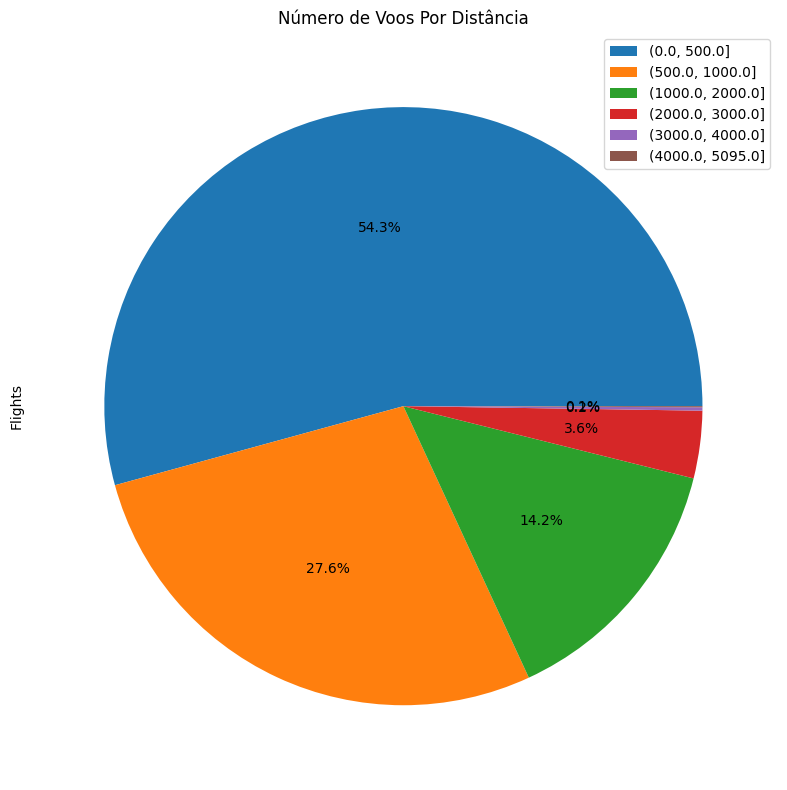

In [425]:
# Plotando o número de voos por distancia em um gráfico de pizza
intervalos_agrupados.plot(kind='pie', 
                          y='Flights', 
                          title='Número de Voos Por Distância', 
                          autopct='%1.1f%%', 
                          labels=None,
                          figsize= (8, 8)
)
plt.tight_layout()
plt.show()

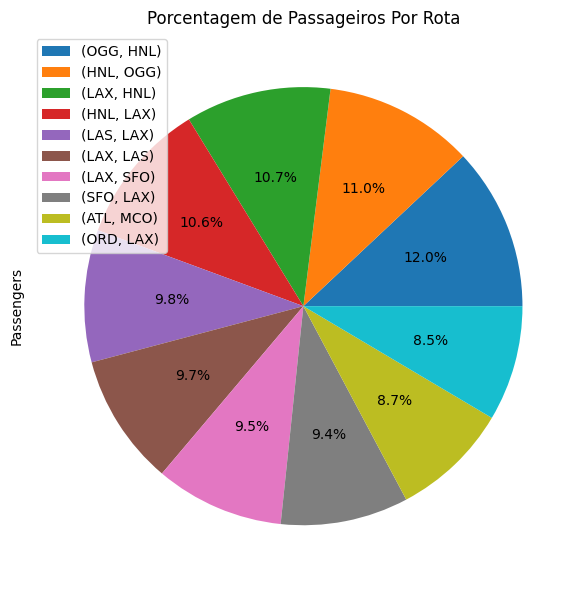

In [426]:
# Plotando o número de passageiros nas 10 principais rotas em um gráfico de pizza
rotas_populares.plot(kind='pie', 
                     y='Passengers', 
                     title='Porcentagem de Passageiros Por Rota',
                     autopct='%1.1f%%',
                     figsize=(6, 6),
                     labels=None
)
plt.tight_layout()
plt.show()

In [427]:
# Agregando origem e destino por distância média
origem_destinos_agregados = df.groupby(['Origin', 'Destination']).agg({'Distance' : 'mean', 'Passengers' : 'sum'})

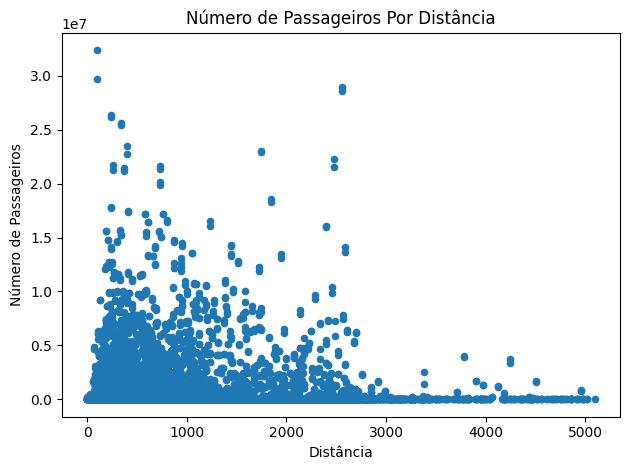

In [428]:
# Visualizando rotas por distância e número de passageiros
#  em um gráfico de dispersão
origem_destinos_agregados.plot(kind='scatter', 
                               x='Distance',
                               y='Passengers' 
)
plt.title('Número de Passageiros Por Distância')
plt.ylabel('Número de Passageiros')
plt.xlabel('Distância')
plt.tight_layout()
plt.show()

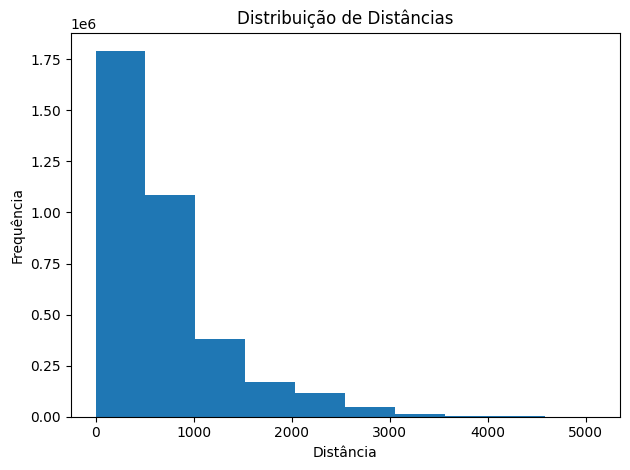

In [429]:
# Plotando a coluna distância em um histograma
df['Distance'].plot(kind='hist')
plt.title('Distribuição de Distâncias')
plt.ylabel('Frequência')
plt.xlabel('Distância')
plt.tight_layout()
plt.show()